In [10]:
from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)


Test set score: 0.88


In [14]:
print(f"X.shape:{X.shape}\ny.shape: {y.shape}")

X.shape:(100, 2)
y.shape: (100,)


C:\Users\umtsr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

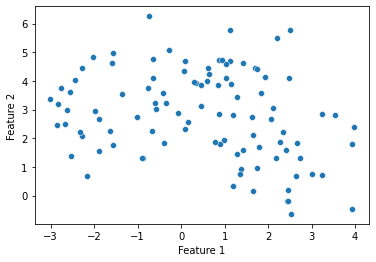

In [11]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
sns.scatterplot(X[:,0],X[:,1])

In [12]:
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [13]:
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


## Cross-validation

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [16]:
iris = load_iris()
lr = LogisticRegression()

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
scores = cross_val_score(lr,iris.data,iris.target)

C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("SCORES:",scores)

SCORES: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [20]:
scores_3fold = cross_val_score(lr,iris.data,iris.target,cv=3)
print("SCORES 3 FOLD:",scores_3fold)

SCORES 3 FOLD: [0.98 0.96 0.98]


C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
average = scores.mean()
print("Average: {:.3f}".format(average))

Average: 0.973


## Leave-one-out CrossValidation

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

In [24]:
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.3f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.967


## Shuffle-Split Cross Validation

In [25]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [26]:
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.3f}".format(scores.mean()))

Cross-validation scores:
[0.96       0.97333333 0.94666667 0.93333333 0.96       0.97333333
 0.97333333 0.97333333 0.94666667 0.92      ]
Mean accuracy: 0.956


## Cross Validation: GroupKFold

In [27]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))

C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [28]:
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]
